<a href="https://colab.research.google.com/github/viniciusdeavila/puc-rio-mvp-s1/blob/main/MVP_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição do Problema

O objetivo deste trabalho é realizar uma análise exploratória dos dados do Relatório Mundial da Felicidade, versão publicada em 2023, por meio do carregamento e da comparação dos indicadores selecionados como os mais relevantes na concepção da "Pontuação da Felicidade", tendo como referência as perspectivas mundial, sul-americana e brasileira.

O Relatório Mundial da Felicidade é uma publicação da Sustainable Development Solutions Network, disponível no portal eletrônico World Happiness Report (https://worldhappiness.report/ed/2023). É alimentado por dados coletados pela Gallup World Poll, desde 2005, e reflete uma demanda mundial por mais atenção à felicidade e ao bem-estar como critérios para a definição de políticas públicas. 

O ranking de felicidade é baseado em avaliações realizadas por indivíduos sobre suas vidas em particular, tendo como referência uma escala de valor (Cantril Ladder Scale) apoiada em uma perspectiva de escada da vida, onde o maior degrau representa o quão satisfeito o indivíduo está com a sua vida.

# 2. Carregamento dos Dados

Para análise dos dados do Relatório Mundial da Felicidade, serão carregados os dados do arquivo Excel "WHR_2005_2023.xlsx", que possui os seguintes campos:

*   pais - nome do país.
*   ano - ano de coleta e preparação dos dados.
*   pontuacao_felicidade - pontuação da felicidade obtida com a média nacional das questões referentes às avaliações de vida dos avaliados.
*   pib_per_capita - PIB per capita em paridade com o poder de compra a preços constantes em dólar.
*   suporte_social - suporte social refere-se à percepção de o avaliado ter com quem contar nos momentos de dificuldade.
*   esperanca_vida_saudavel - esperança de vida saudável baseia-se no indicador de expectativa de vida saudável ao nascer, extraído do relatório da Organização Mundial da Saúde - OMS.
*   liberdade_fazer_escolhas - liberdade para fazer escolhas de vida refere-se à percepção de o avaliado se sentir satisfeito ou não com sua liberade de escolher o que fazer com a sua própria vida.
*   generosidade - generosidade é o resíduo da regressão da média nacional de respostas em relação à doações de caridade no PIB per capita.
*   percepcao_corrupcao - percepção da corrupção refere-se à percepção do avaliado em relação à corrupção no país e nas empresas.

2.1. Importação de Bibliotecas

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import plotly.express as px

In [2]:
# Inbir a exibição de warnings
import warnings
warnings.filterwarnings("ignore")

2.2. Carregamento dos Dados do Relatório Mundial da Felicidade

In [3]:
# Carregar arquivo Excel com dados do Relatório Mundial da Felicidade
url = 'WHR_2005_2023.xlsx'
colunas = ['pais','ano','pontuacao_felicidade','pib_per_capita','suporte_social','esperanca_vida_saudavel','liberdade_fazer_escolhas','generosidade','percepcao_corrupcao']
df_mundial = pd.read_excel(url, names = colunas)
df_mundial.head()

,pais,ano,pontuacao_felicidade,pib_per_capita,suporte_social,esperanca_vida_saudavel,liberdade_fazer_escolhas,generosidade,percepcao_corrupcao
0,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850
1,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707
2,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731
3,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776
4,Afghanistan,2013,3.572,7.680,0.484,52.0,0.578,0.063,0.823


In [4]:
# Verificar adequação das variáveis quanto ao tipo de dado
df_mundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais                      2335 non-null   object 
 1   ano                       2335 non-null   int64  
 2   pontuacao_felicidade      2335 non-null   float64
 3   pib_per_capita            2315 non-null   float64
 4   suporte_social            2322 non-null   float64
 5   esperanca_vida_saudavel   2280 non-null   float64
 6   liberdade_fazer_escolhas  2302 non-null   float64
 7   generosidade              2262 non-null   float64
 8   percepcao_corrupcao       2219 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 164.3+ KB


In [5]:
# Ajustar os tipos das variáveis
df_mundial['ano'] = df_mundial['ano'].astype(str)
df_mundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais                      2335 non-null   object 
 1   ano                       2335 non-null   object 
 2   pontuacao_felicidade      2335 non-null   float64
 3   pib_per_capita            2315 non-null   float64
 4   suporte_social            2322 non-null   float64
 5   esperanca_vida_saudavel   2280 non-null   float64
 6   liberdade_fazer_escolhas  2302 non-null   float64
 7   generosidade              2262 non-null   float64
 8   percepcao_corrupcao       2219 non-null   float64
dtypes: float64(7), object(2)
memory usage: 164.3+ KB


# 3. Análise dos Dados

3.1. Estatísticas Descritivas



In [6]:
# Visualizar dimensões do DataFrame
df_mundial.shape

(2335, 9)

In [7]:
# Visualizar resumo estatístico do DataFrame
df_mundial.describe()

,pontuacao_felicidade,pib_per_capita,suporte_social,esperanca_vida_saudavel,liberdade_fazer_escolhas,generosidade,percepcao_corrupcao
count,2335.000000,2315.000000,2322.000000,2280.000000,2302.000000,2262.000000,2219.000000
mean,5.483533,9.394194,0.810151,63.399990,0.750214,0.001370,0.743924
std,1.125872,1.155946,0.121255,6.844483,0.138965,0.160031,0.185341
min,1.281000,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000
25%,4.649500,8.502500,0.745250,59.195000,0.659250,-0.108750,0.688000
50%,5.439000,9.503000,0.836000,65.100000,0.772000,-0.021000,0.799000
75%,6.316000,10.380500,0.905000,68.560000,0.861000,0.094750,0.868000
max,8.019000,11.664000,0.987000,77.280000,0.985000,0.703000,0.983000


Por meio do resumo estatístico, podemos observar que as medianas dos indicadores (2º Quartil - 50%) aproximan-se às médias (mean), porém, os valores mínimos e máximos aparentam significativa amplitude em relação à média (mean), se considerarmos os desvios-padrões (std) calculados, o que nos leva a vislumbrar ou uma grande dispersão dos dados ou a existência de *outliers* significativos.

3.2. Visualizações Unimodais

A seguir, poderemos notar, nos histogramas e nos gráficos de densidade, que o indicador "Pontuação da Felicidade" é o que melhor apresenta uma distribuição aproximadamente simétrica. Os demais indicadores apresentam distribuições mais assimétricas, o que pode indicar a concentração de dados em valores mais altos ou mais baixos, como ocorre com o indicador "Percepção da Corrupção".

Nesse indicador, há maior concentração de dados em valores mais altos, porém, a média sofrerá influência da cauda à esquerda e se deslocará em sua direção. Mas, ainda assim, haverá mais observações acima da média do que abaixo dela.

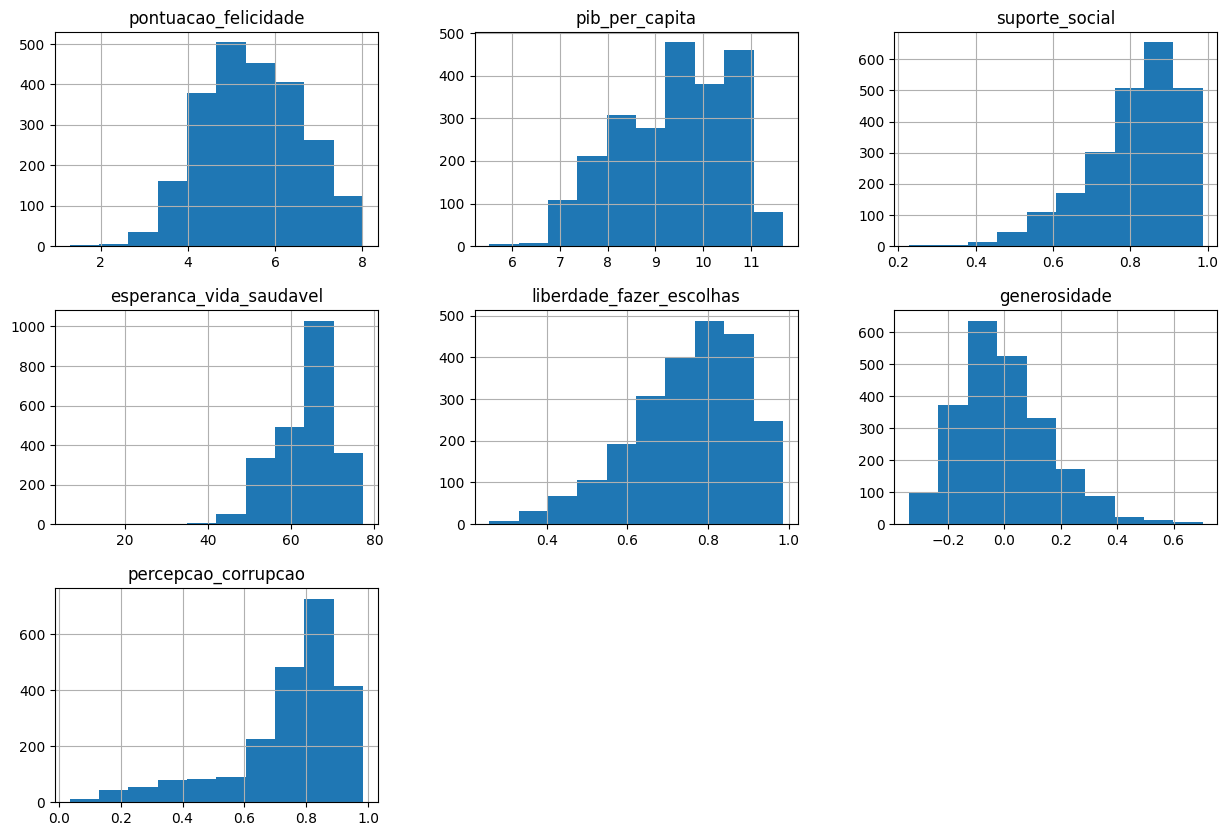

In [8]:
# Visualizar histogramas dos atributos do DataFrame
df_mundial.hist(figsize = (15,10))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

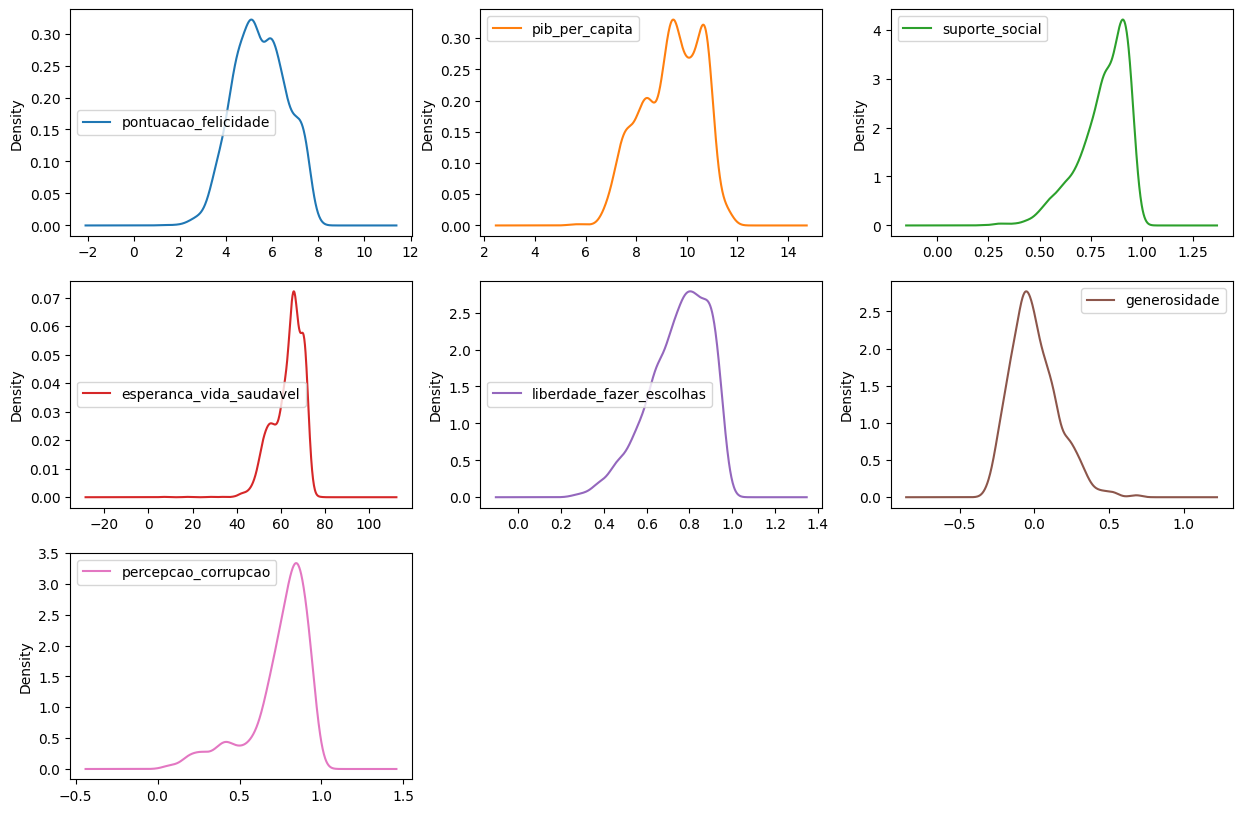

In [9]:
# Visualizar gráficos de densidade dos atributos do DataFrame
df_mundial.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show

O gráfico de *boxplot*, por sua vez, permite outra visualização da distribuição dos dados, evidenciando a mediana e o intervalo de concentração dos dados, determinados pelo 1º e pelo 3º Quartil, ratificando as observações realizadas acima em relação ao indicadores "Pontuação da Felicidade" e "Percepção da Corrupção".

Notaremos que o *boxplot* referente à "Pontuação da Felicidade" é bastante equilibrado, mais bem distribuído, apresentando apenas dois *outliers* como ponto de atenção. Já o *boxplot* referente à "Percepção da Corrupção", apresenta grande quantidade de *outliers* e sua mediana aproxima-se ao 3º Quartil, significativamente acima da média observada (0,74), corroborando com as observações realizadas acima, a partir da visualização dos histogramas e dos gráficos de densidade.

<function matplotlib.pyplot.show(close=None, block=None)>

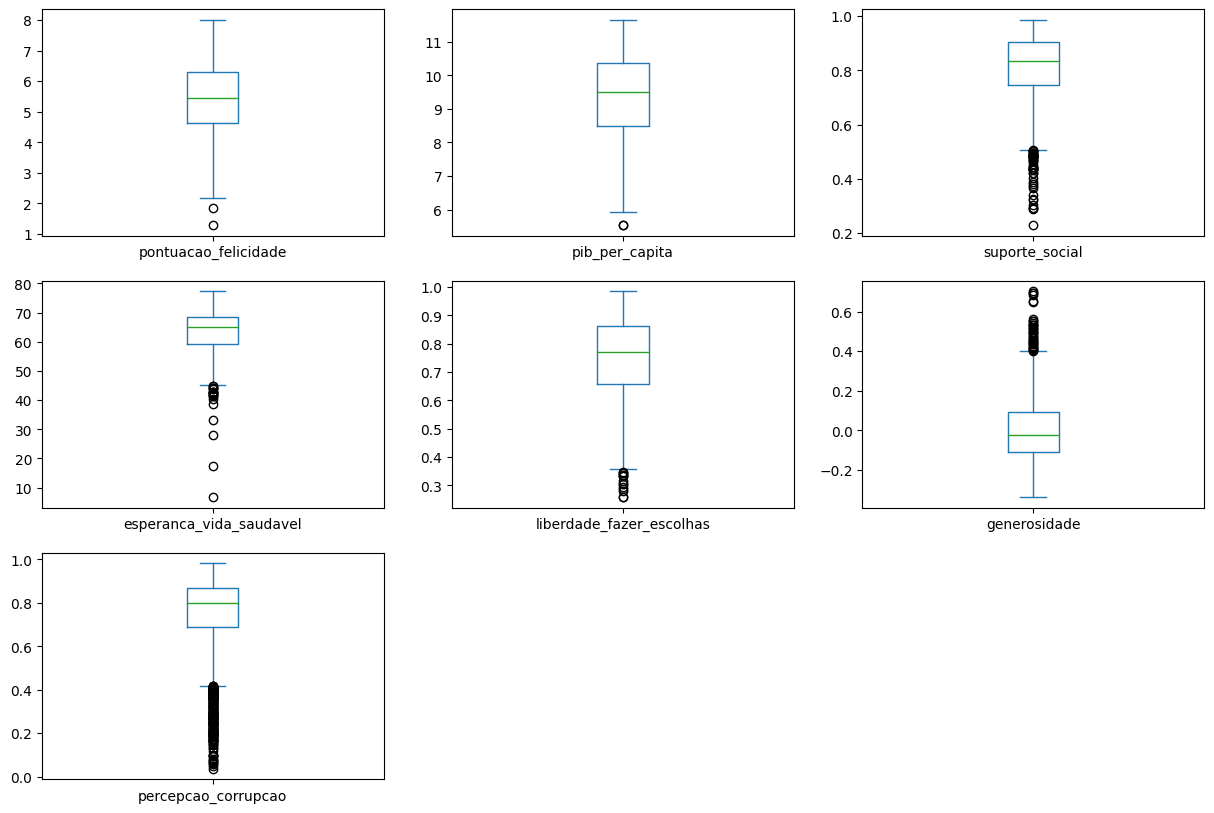

In [10]:
# Visualizar gráfico de boxplot dos atributos do DataFrame
df_mundial.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show

3.3. Visualizações Multimodais

A seguir, visualizaremos a correlação entre os indicadores do Relatório Mundial da Felicidade, a fim de identificar os indicadores mais relevantes na concepção da "Pontuação da Felicidade".

Observaremos que os indicadores "PIB per Capita" e "Esperança de Vida Saudável" possuem a maior correlação dentre todos os indicadores (0,82). Entretanto, tendo como foco a "Pontuação da Felicidade", perceberemos que "PIB per Capita", "Suporte Social" e "Esperança de Vida Saudável" são os indicadores que apresentam maior correlação com a "Pontuação da Felicidade".

Vale destacar ainda que essa correlação é positiva, ou seja, quanto mais altos os indicadores "PIB per Capita", "Suporte Social" e "Esperança de Vida Saudável", mais alta a "Pontuação da Felicidade".

Além disso, merece destaque o indicador "Percepção da Corrupção", que apresenta correlação negativa com todos os demais indicadores, inclusive com a "Pontuação da Felicidade". Ou seja, quanto menor a "Percepção da Corrupção", maior a "Pontuação da Felicidade" e dos demais indicadores.

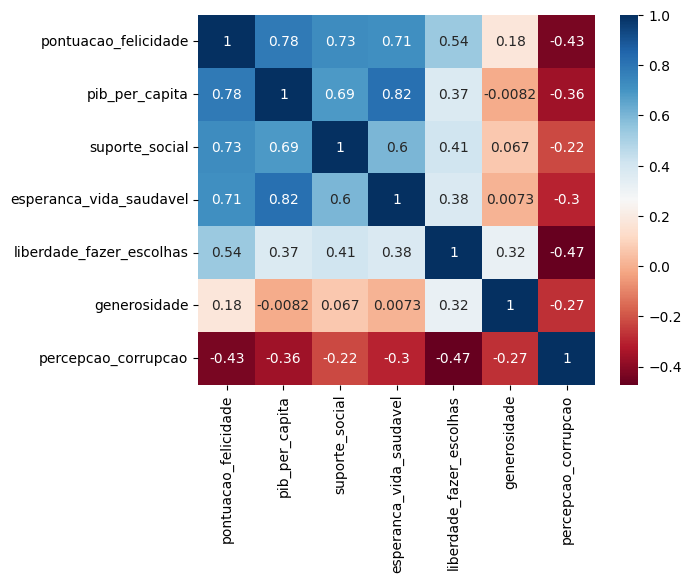

In [11]:
# Visualizar matriz de correlação dos atributos do DataFrame
sns.heatmap(df_mundial.corr(), annot=True, cmap='RdBu');

Em consonância com a matriz de correlação apresentada acima, os gráficos de dispersão, a seguir, demonstram a forte correlação positiva existente entre a "Pontuação da Felicidade" e os indicadores "PIB per Capita", "Suporte Social" e "Esperança de Vida Saudável". Assim como, evidenciam uma moderada-forte correlação negativa entre a "Percepção da Corrupção" e os demais indicadores.

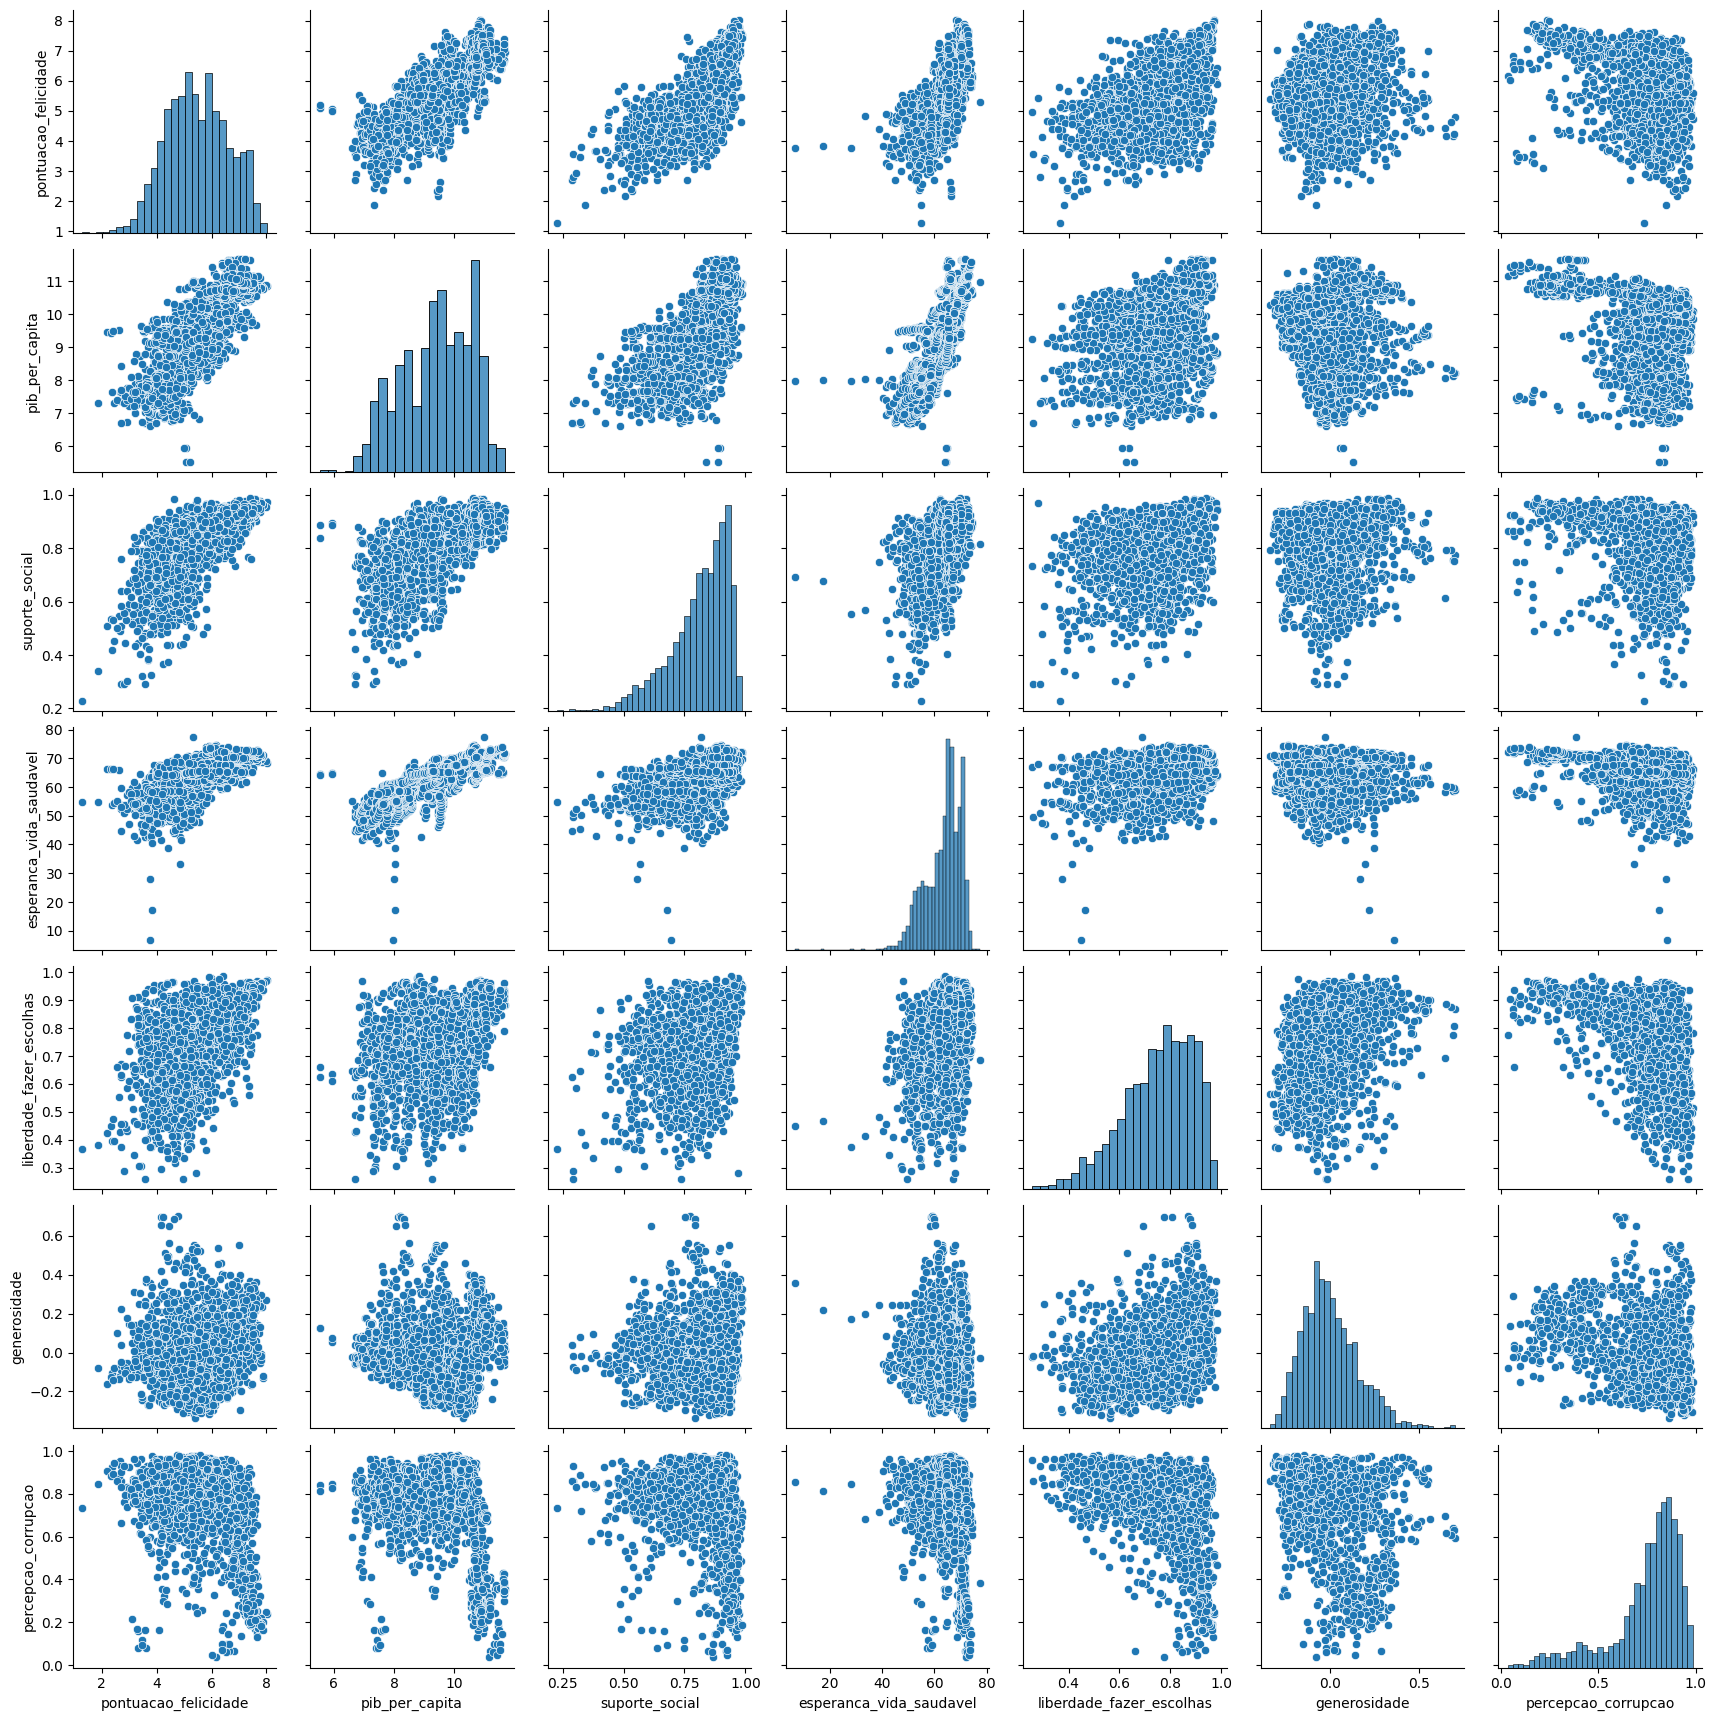

In [12]:
# Visualizar gráfico de dispersão (Scater Plot) dos atributos do DataFrame
sns.pairplot(df_mundial)

# 4. Pré-processamento de Dados

A base de dados do Relatório Mundial da Felicidade apresenta alguns valores inconsistentes, conforme demonstrado a seguir, que passarão por processo de limpeza e tratamento de missings.

4.1. Limpeza

Os valores zerados, conforme visualização a seguir, serão substituídos por *Null*, a fim de que sejam contemplados no tratamento de missings.

In [13]:
# Verificar valores zerados do DataFrame
df_mundial.isin([0]).sum()

pais                        0
ano                         0
pontuacao_felicidade        0
pib_per_capita              0
suporte_social              0
esperanca_vida_saudavel     0
liberdade_fazer_escolhas    0
generosidade                8
percepcao_corrupcao         0
dtype: int64

In [14]:
# Substituir valores zerados por Null e visualizar novamente os valores zerados do DataFrame
df_mundial.replace(0, np.nan, inplace = True)
df_mundial.isin([0]).sum()

pais                        0
ano                         0
pontuacao_felicidade        0
pib_per_capita              0
suporte_social              0
esperanca_vida_saudavel     0
liberdade_fazer_escolhas    0
generosidade                0
percepcao_corrupcao         0
dtype: int64

4.2. Tratamento de Missings

Os valores *Null*, conforme visualizações a seguir, serão substituídos pelas médias de cada indicador por país, respeitando-se, assim, as dimensões de cada país em relação aos demais.

In [15]:
# Verificar nulls do DataFrame
df_mundial.isnull().sum()

pais                          0
ano                           0
pontuacao_felicidade          0
pib_per_capita               20
suporte_social               13
esperanca_vida_saudavel      55
liberdade_fazer_escolhas     33
generosidade                 81
percepcao_corrupcao         116
dtype: int64

<Axes: >

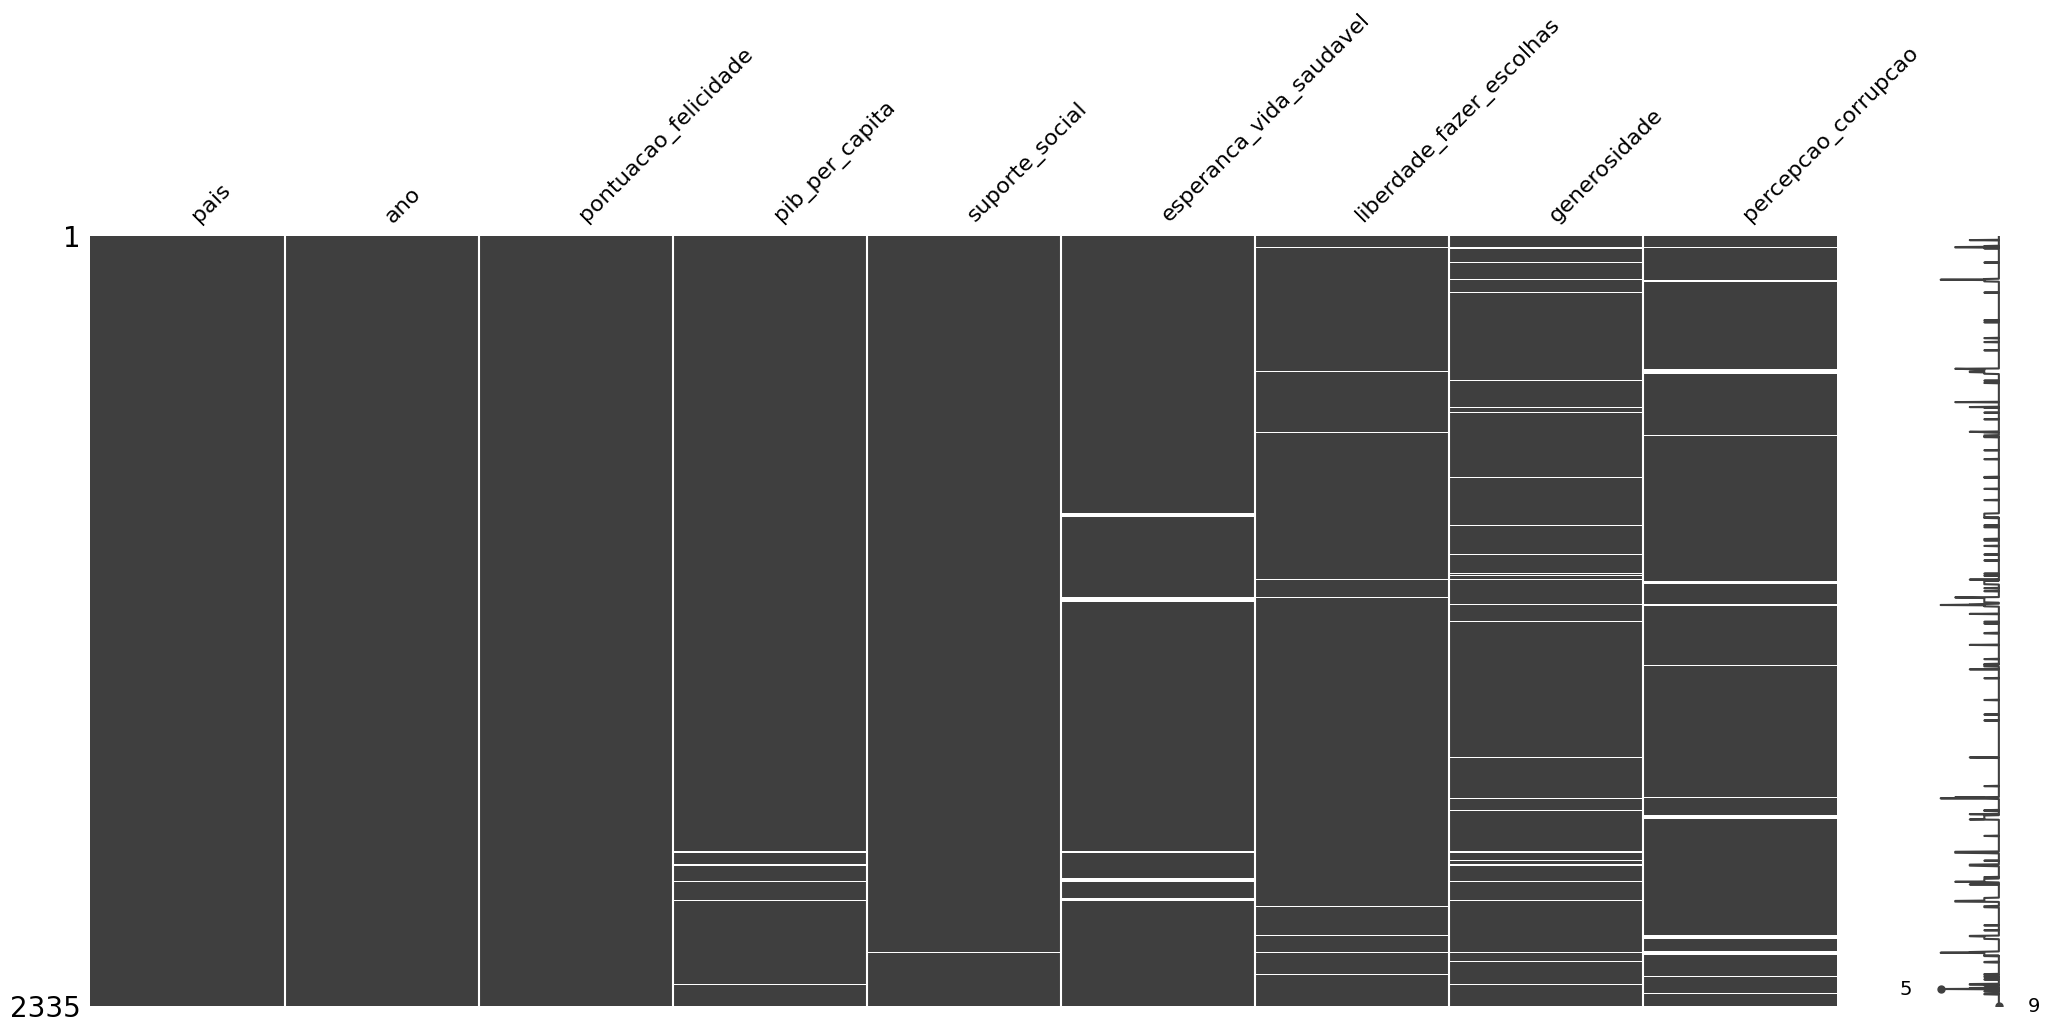

In [16]:
# Exibir visualização matricial do DataFrame
ms.matrix(df_mundial)

In [31]:
# Definir valores para o preenchimento dos missings do DataFrame de acordo com a média por País
values = {'pib_per_capita': df_mundial.groupby('pais')['pib_per_capita'].transform('mean'), 
          'suporte_social': df_mundial.groupby('pais')['suporte_social'].transform('mean'), 
          'esperanca_vida_saudavel': df_mundial.groupby('pais')['esperanca_vida_saudavel'].transform('mean'), 
          'liberdade_fazer_escolhas': df_mundial.groupby('pais')['liberdade_fazer_escolhas'].transform('mean'), 
          'generosidade': df_mundial.groupby('pais')['generosidade'].transform('mean'),
          'percepcao_corrupcao': df_mundial.groupby('pais')['percepcao_corrupcao'].transform('mean')}

# Realizar o preenchimento dos missings
df_mundial = df_mundial.fillna(value = values)

In [18]:
# Verificar nulls do DataFrame
df_mundial.isnull().sum()

pais                         0
ano                          0
pontuacao_felicidade         0
pib_per_capita               9
suporte_social               1
esperanca_vida_saudavel      4
liberdade_fazer_escolhas     0
generosidade                 9
percepcao_corrupcao         13
dtype: int64

<Axes: >

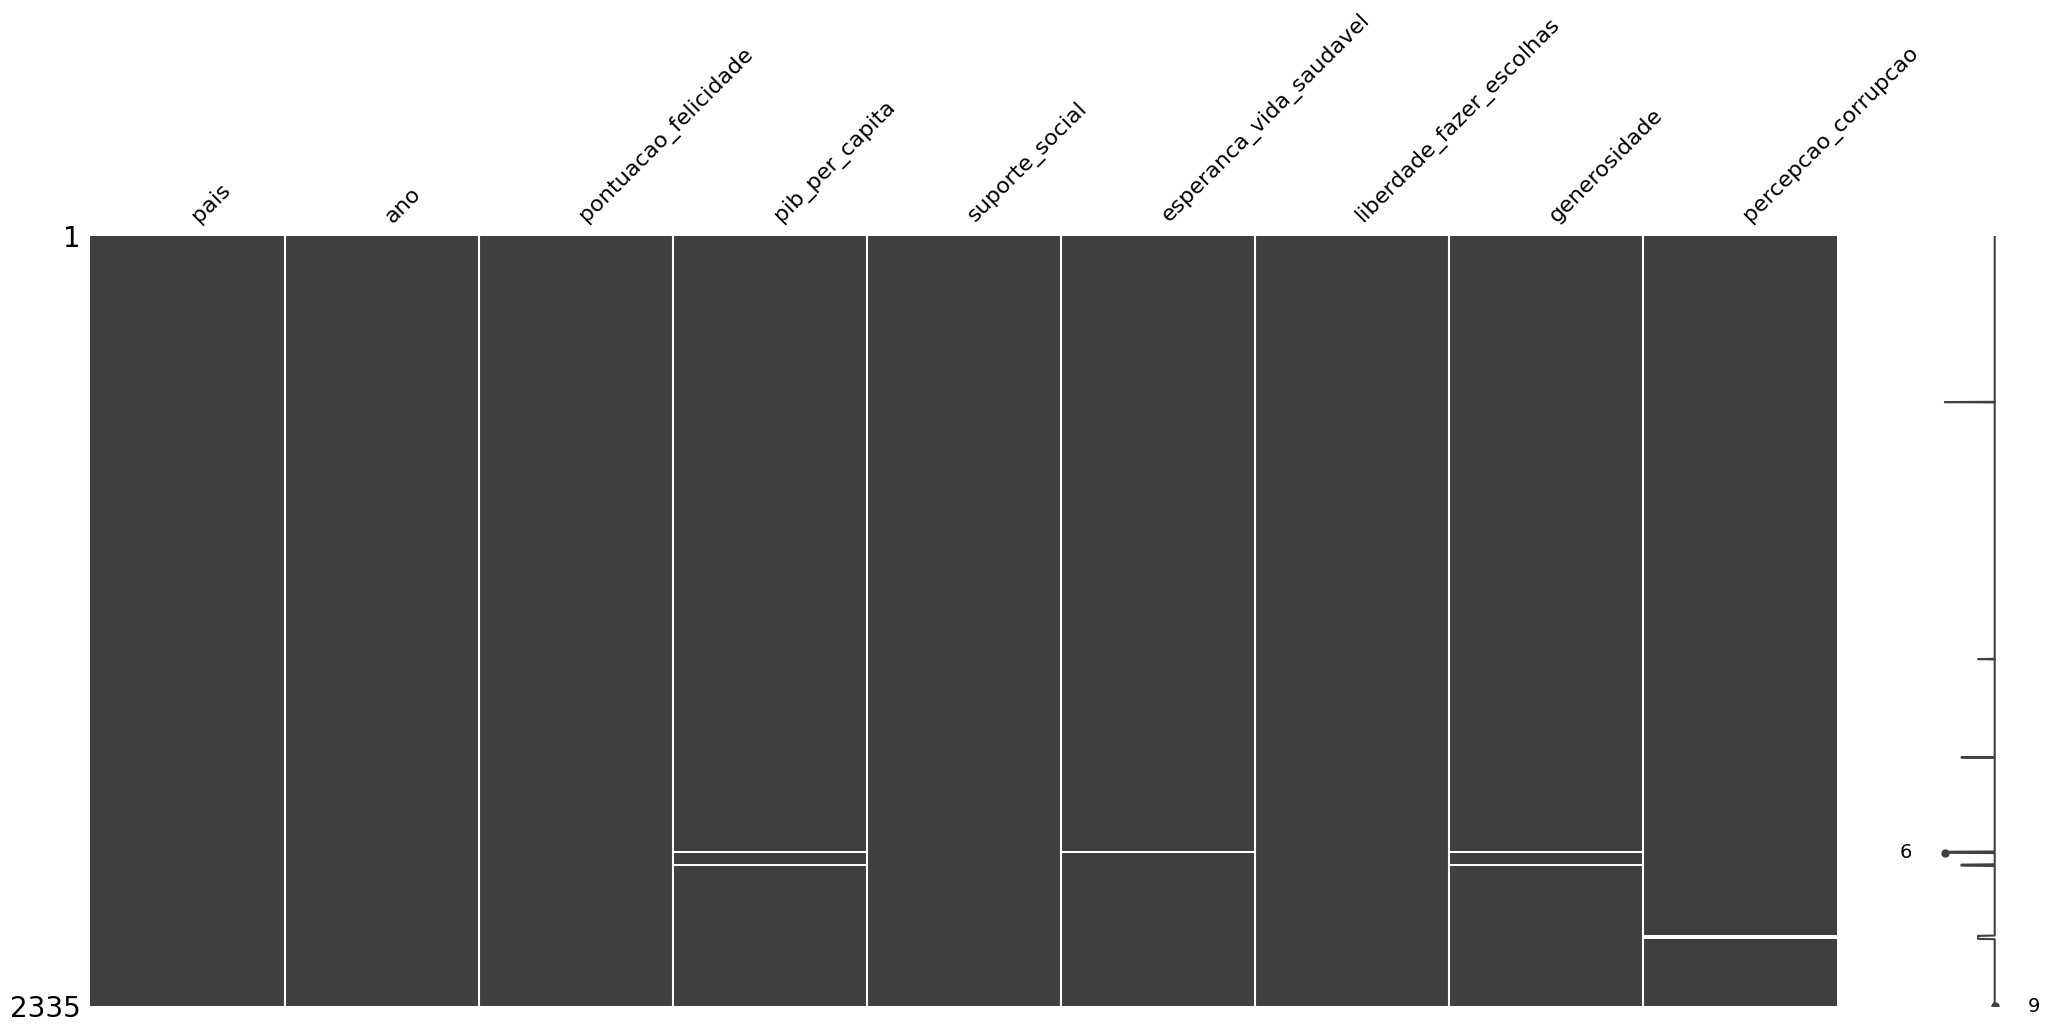

In [19]:
# Exibir visualização matricial do DataFrame
ms.matrix(df_mundial)

Observa-se acima que grande parte dos valores nulos foi tratada. Porém, os valores nulos residuais decorrem do fato de determinados países não possuírem nenhum valor preenchido para o indicador, o que impediu a realização do cálculo da média.

Contudo, considerando-se que alguns *insights* serão gerados com base nas médias dos países, agrupadas pelas perspectivas mundial, sul-americana e brasileira, esses valres residuais serão mantidos no DataFrame.

# 5. Insights

Os dados do Relatório Mundial da Felicidade permitem a realização de comparações de indicadores entre os países que compõem a base de dados e a visualização da evolução de cada país no tempo. Assim, tendo como referência as perspectivas mundial, sul-americana e brasileira, apresentam-se a seguir alguns *insights* decorrentes dessas comparações, proporcionados por meio de análises gráficas.

Considerando-se que cada país apresenta dados em diferentes anos, uns mais recentes do que outros, utilizaremos as médias dos indicadores por país para a realização de visualização e comparações.

In [20]:
# Criar DataFrame com as médias dos indicadores por país
df_mundial_mean = df_mundial.groupby(['pais']).mean().reset_index().sort_values(['pontuacao_felicidade'], ascending = False)
df_mundial_mean.head()

,pais,pontuacao_felicidade,pib_per_capita,suporte_social,esperanca_vida_saudavel,liberdade_fazer_escolhas,generosidade,percepcao_corrupcao
39,Denmark,7.668667,10.894556,0.957000,70.173889,0.942944,0.166000,0.198833
48,Finland,7.630625,10.760375,0.953125,70.433125,0.943688,0.001875,0.237563
111,Norway,7.468923,11.065462,0.947923,71.023077,0.951231,0.138154,0.330923
63,Iceland,7.465091,10.883455,0.978909,71.861364,0.931545,0.246000,0.693818
142,Switzerland,7.456538,11.136846,0.936231,72.135385,0.914923,0.090462,0.295923


In [21]:
# Visualizar dimensões do DataFrame
df_mundial_mean.shape

(165, 8)

Os gráficos, a seguir, apresentam o ranking dos países por "Pontuação da Felicidade", visualizados em dois segmentos, cada um contendo 50% dos países constantes do Relatório Mundial da Felicidade. O primeiro segmento contempla os países mais bem ranqueados e o segundo, os piores países do ranking. Poderemos notar que o Brasil ocupa o 27º lugar no ranking, estando à frente de países da Europa como Espanha e Itália.

In [22]:
# Definir padrão de cores
cor_padrao = '#4682B4'
cor_brasil = '#32CD32'
cor_sul = '#FF8C00'
cor_tracejado = '#DCDCDC'

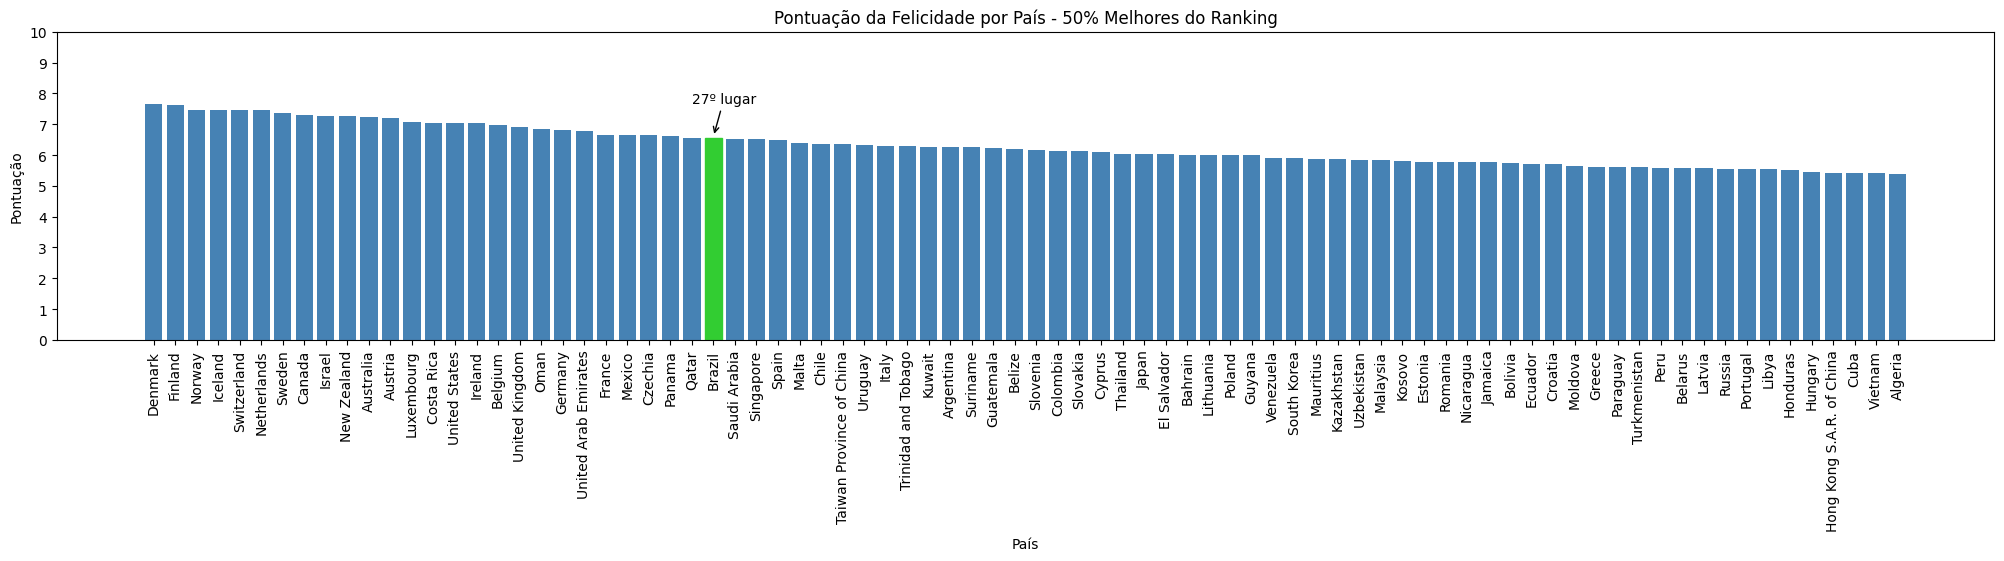

In [23]:
# Gerar gráfico de colunas com a classificação dos melhores países por Pontuação da Felicidade, destacando o Brasil
df_mundial_melhores = df_mundial_mean[0:82]

fig, ax = plt.subplots(figsize = (25, 4))
grafico = ax.bar(x = df_mundial_melhores['pais'], height = df_mundial_melhores['pontuacao_felicidade'], color = cor_padrao)
grafico[26].set_color(cor_brasil)

plt.title('Pontuação da Felicidade por País - 50% Melhores do Ranking')
plt.xlabel('País')
plt.ylabel('Pontuação')

xlabels = df_mundial_melhores['pais']
ax.set_xticklabels(xlabels, rotation = 90, ha = 'center')
plt.yticks(range(0,11))

ax.annotate("27º lugar", xy=(26, 6.6), xycoords='data', xytext=(25, 7.7), textcoords='data', arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3"))

plt.show()

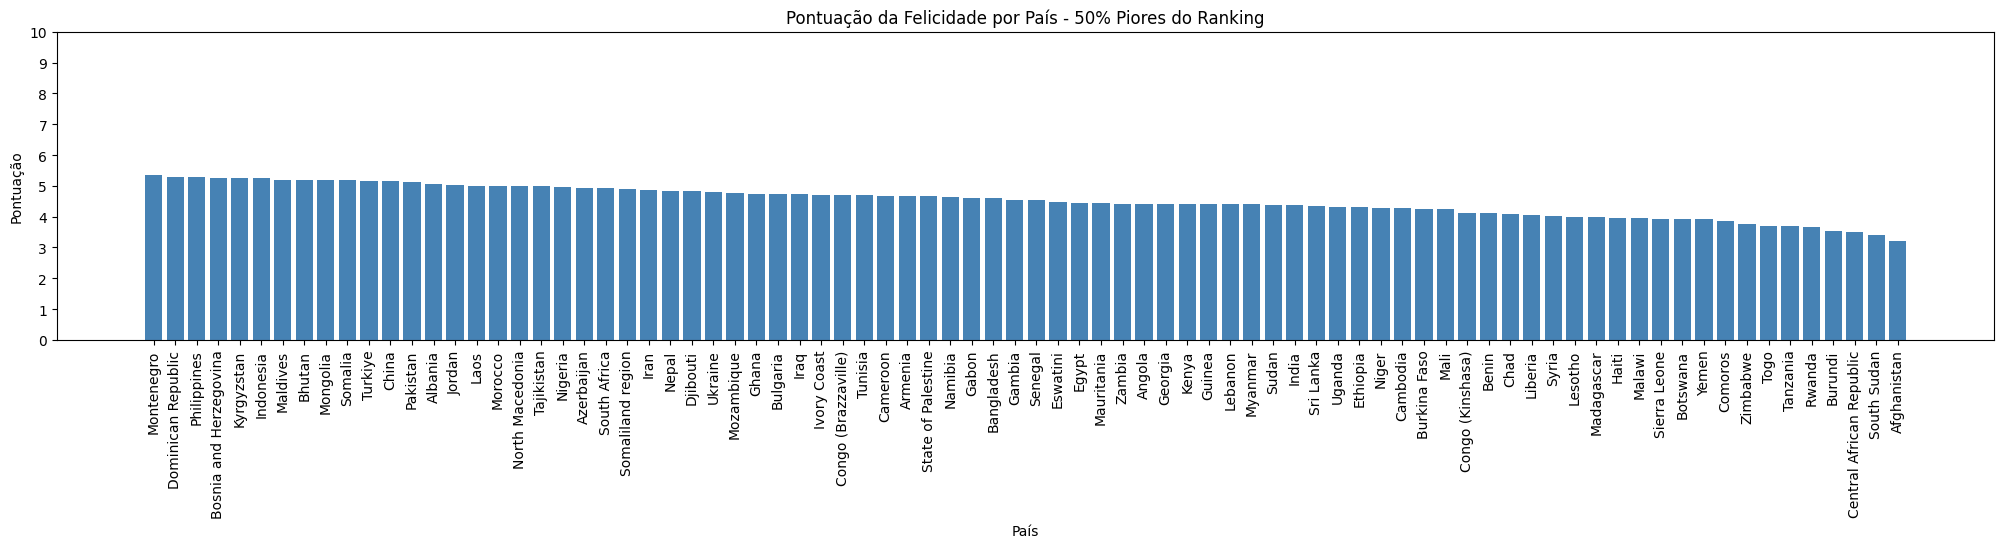

In [24]:
# Gerar gráfico de colunas com a classificação dos piores países por Pontuação da Felicidade
df_mundial_piores = df_mundial_mean[83:165]

fig, ax = plt.subplots(figsize = (25, 4))
ax.bar(x = df_mundial_piores['pais'], height = df_mundial_piores['pontuacao_felicidade'], color = cor_padrao)

plt.title('Pontuação da Felicidade por País - 50% Piores do Ranking')
plt.xlabel('País')
plt.ylabel('Pontuação')

xlabels = df_mundial_piores['pais']
ax.set_xticklabels(xlabels, rotation = 90, ha = 'center')

plt.yticks(range(0,11))

plt.show()

Considerando-se a perspectiva sul-americana, o gráfico a seguir apresenta a posição do Brasil em relação aos países da América do Sul, evidenciando que o Brasil ocupa o 1º lugar no ranking.

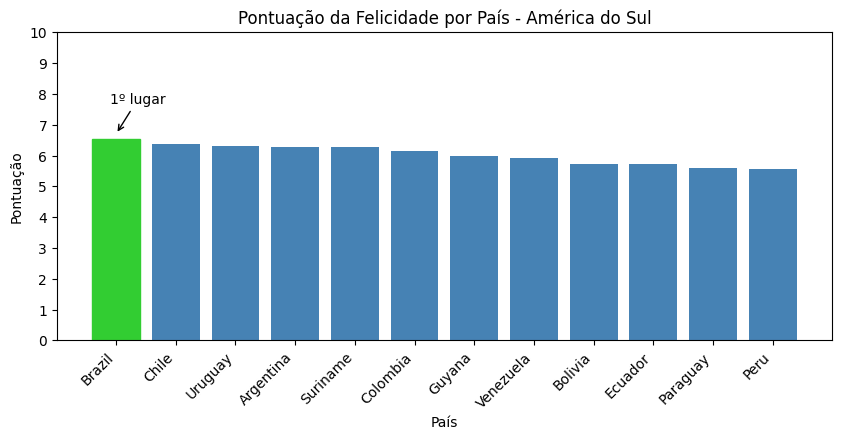

In [25]:
# Criar DataFrame com os países da América do Sul
paises = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']
df_sul = df_mundial_mean.loc[df_mundial_mean['pais'].isin(paises)]

# Gerar gráfico de colunas com a classificação dos melhores países da América do Sul por Pontuação da Felicidade, destacando o Brasil
fig, ax = plt.subplots(figsize = (10, 4))
grafico = ax.bar(x = df_sul['pais'], height = df_sul['pontuacao_felicidade'], color = cor_padrao)
grafico[0].set_color(cor_brasil)

plt.title('Pontuação da Felicidade por País - América do Sul')
plt.xlabel('País')
plt.ylabel('Pontuação')

xlabels = df_sul['pais']
ax.set_xticklabels(xlabels, rotation = 45, ha = 'right')

plt.yticks(range(0,11))

ax.annotate("1º lugar", xy=(0, 6.7), xycoords='data', xytext=(-0.1, 7.7), textcoords='data', arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3"))

plt.show()

A seguir, poderemos observar em um único gráfico a pontuação da felicidade do Brasil em relação às pontuações mínima, média e máxima na perspectiva mundial, além da média da América do Sul, a fim de evidenciar o quão distante o Brasil se encontra dos limites superior e inferior, e das médias mundial e sul-americana. Perceberemos que o Brasil está mais próximo das referências superiores que das referências inferiores.

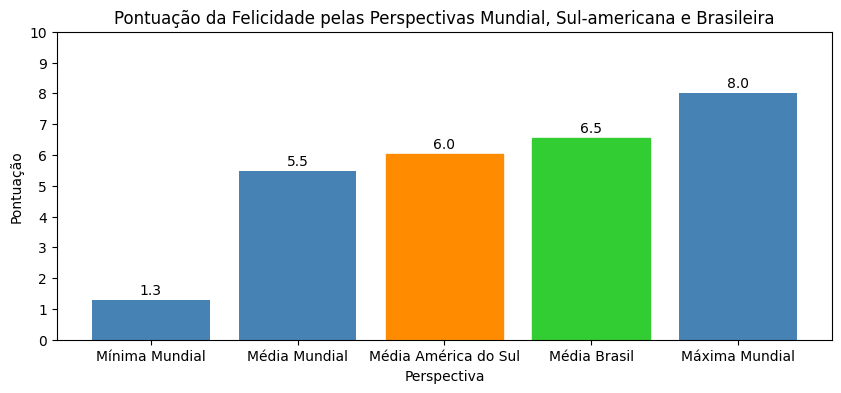

In [26]:
# Gerar gráfico de colunas do comparativo mundial e sul-americano com o Brasil

# Criar DataFrame com as médias
mundial_mean = df_mundial.describe().reset_index().loc[df_mundial.describe().reset_index()['index'].isin({'mean'})] 
mundial_min = df_mundial.describe().reset_index().loc[df_mundial.describe().reset_index()['index'].isin({'min'})] 
mundial_max = df_mundial.describe().reset_index().loc[df_mundial.describe().reset_index()['index'].isin({'max'})] 
sul = df_sul.describe().reset_index().loc[df_sul.describe().reset_index()['index'].isin({'mean'})]
brasil = df_sul.loc[df_sul['pais'].isin({'Brazil'})]

dados = [['Mínima Mundial', mundial_min.iloc[0,1]],
         ['Média Mundial', mundial_mean.iloc[0,1]],
         ['Média América do Sul', sul.iloc[0,1]],
         ['Média Brasil', brasil.iloc[0,1]],
         ['Máxima Mundial', mundial_max.iloc[0,1]]]

dados = pd.DataFrame(dados, columns = ['pais', 'pontuacao_felicidade'])
dados.head()

# Gerar o gráfico de colunas
fig, ax = plt.subplots(figsize = (10, 4))
grafico = ax.bar(x = dados['pais'], height = dados['pontuacao_felicidade'], color = cor_padrao)
grafico[3].set_color(cor_brasil)
grafico[2].set_color(cor_sul)

ax.bar_label(grafico, fmt = '%.01f', label_type = 'edge', padding = 2)

plt.title('Pontuação da Felicidade pelas Perspectivas Mundial, Sul-americana e Brasileira')
plt.xlabel('Perspectiva')
plt.ylabel('Pontuação')

plt.yticks(range(0,11))

plt.show()

Considerando-se as mesmas perspectivas apresentadas acima, observaremos, a seguir, a evolução da "Pontuação da Felicadade" por ano, a fim de visualizarmos as tendências de evoulação de cada perspectiva, além da comparação entre elas. Perceberemos que o Brasil, assim como a média dos países da América do Sul, apresentam uma tendência de queda na "Pontuação da Felicidade" nos últimos 10 anos, diferentemente da média mundial, que apresenta estabilidade no mesmo período.

Vale destacar, no entanto, que a aparente estabilidade da média mundial decorre de uma leve tendência de alta dos países com maior "Pontuação da Felicidade" e de uma tendência de baixa dos países com menor "Pontuação da Felicidade". Ou seja, os países "mais felizes" estão cada vez mais felizes, ao passo que os países "menos felizes" estão cada vez menos felizes.

In [27]:
# Criar DataFrame com as médias da Pontuação da Felicidade por Ano
d_mundial_mean = df_mundial.loc[:, ['ano', 'pontuacao_felicidade']]
d_mundial_mean = d_mundial_mean.groupby(['ano']).mean().reset_index()
d_mundial_mean = d_mundial_mean.rename(columns = {'pontuacao_felicidade': 'Média Mundial'})

d_mundial_min = df_mundial.loc[:, ['ano', 'pontuacao_felicidade']]
d_mundial_min = d_mundial_min.groupby(['ano']).min().reset_index()
d_mundial_min = d_mundial_min.rename(columns = {'pontuacao_felicidade': 'Mínima Mundial'})

d_mundial_max = df_mundial.loc[:, ['ano', 'pontuacao_felicidade']]
d_mundial_max = d_mundial_max.groupby(['ano']).max().reset_index()
d_mundial_max = d_mundial_max.rename(columns = {'pontuacao_felicidade': 'Máxima Mundial'})

paises = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']
d_sul = df_mundial.loc[df_mundial['pais'].isin(paises)]
d_sul = d_sul.loc[:, ['ano', 'pontuacao_felicidade']]
d_sul = d_sul.groupby(['ano']).mean().reset_index()
d_sul = d_sul.rename(columns = {'pontuacao_felicidade': 'Média América do Sul'})

d_brasil = df_mundial.loc[df_mundial['pais'].isin({'Brazil'})]
d_brasil = d_brasil.loc[:, ['ano', 'pontuacao_felicidade']]
d_brasil = d_brasil.rename(columns = {'pontuacao_felicidade': 'Brasil'})

dados = pd.merge(d_mundial_mean, d_mundial_min, how = 'left', on = 'ano')
dados = pd.merge(dados, d_mundial_max, how = 'left', on = 'ano')
dados = pd.merge(dados, d_sul, how = 'left', on = 'ano')
dados = pd.merge(dados, d_brasil, how = 'left', on = 'ano')
dados.head()

,ano,Média Mundial,Mínima Mundial,Máxima Mundial,Média América do Sul,Brasil
0,2005,6.446259,4.719,8.019,6.903500,6.637
1,2006,5.196899,3.202,7.672,5.627889,NaN
2,2007,5.418275,3.280,7.834,5.702700,6.321
3,2008,5.434055,2.808,7.971,5.782500,6.691
4,2009,5.457667,3.408,7.683,6.287900,7.001


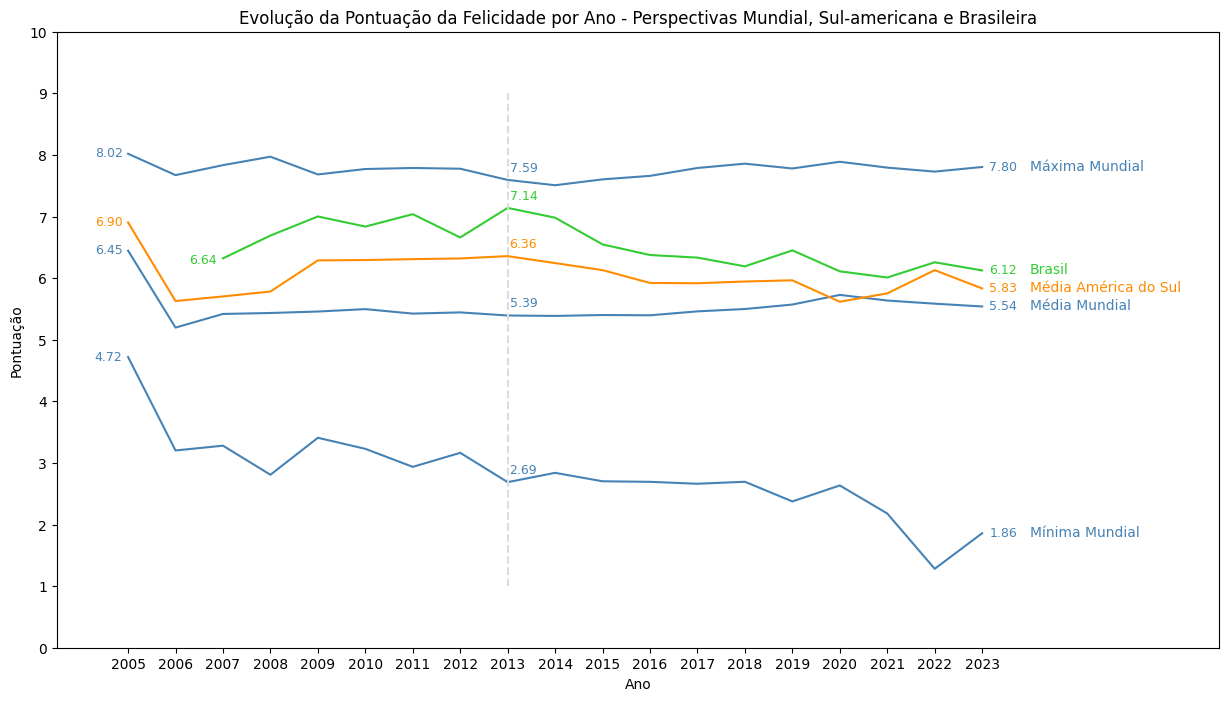

In [28]:
# Gerar gráfico de linhas do comparativo mundial e sul-americano com o Brasil
dados['ano'] = pd.to_numeric(dados['ano'])

fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(dados['ano'], dados['Mínima Mundial'], label = 'Mínima Mundial', color = cor_padrao)
ax.plot(dados['ano'], dados['Média Mundial'], label = 'Média Mundial', color = cor_padrao)
ax.plot(dados['ano'], dados['Média América do Sul'], label = 'Média América do Sul', color = cor_sul)
ax.plot(dados['ano'], dados['Brasil'], label = 'Brasil', color = cor_brasil)
ax.plot(dados['ano'], dados['Máxima Mundial'], label = 'Máxima Mundial', color = cor_padrao)

plt.title('Evolução da Pontuação da Felicidade por Ano - Perspectivas Mundial, Sul-americana e Brasileira')
plt.xlabel('Ano')
plt.ylabel('Pontuação')

plt.axvline(x = 2013, ymin = 0.1, ymax = 0.9, color = cor_tracejado, linestyle = '--')

xticks = np.arange(start = min(dados['ano']), stop = max(dados['ano'] + 1), step = 1)
ax.set_xticks(ticks = xticks, labels = ['{:.0f}'.format(x) for x in xticks])

plt.xlim([min(dados['ano'] - 1.5), max(dados['ano']) + 5])

handles = ax.get_legend_handles_labels()
len_y = len(handles[0][3].get_ydata()) - 1
for i in range(len(handles[0])):
  lastx = max(handles[0][i].get_xdata())
  lasty = handles[0][i].get_ydata()[len_y]
  label = handles[1][i]
  ax.annotate(text = label, xy = (lastx + 1, lasty - 0.05), color = handles[0][i].get_color(), size = 10)
  if handles[1][i] == 'Brasil':
    ax.annotate(text = '{:.2f}'.format(handles[0][i].get_ydata()[0]), xy = (handles[0][i].get_xdata()[0] + 1.28, handles[0][i].get_ydata()[0] - 0.39), color = handles[0][i].get_color(), size = 9)
  else:
    ax.annotate(text = '{:.2f}'.format(handles[0][i].get_ydata()[0]), xy = (handles[0][i].get_xdata()[0] - 0.7, handles[0][i].get_ydata()[0] - 0.05), color = handles[0][i].get_color(), size = 9)
  ax.annotate(text = '{:.2f}'.format(handles[0][i].get_ydata()[8]), xy = (handles[0][i].get_xdata()[8] + 0.04, handles[0][i].get_ydata()[8] + 0.14), color = handles[0][i].get_color(), size = 9)
  ax.annotate(text = '{:.2f}'.format(handles[0][i].get_ydata()[18]), xy = (handles[0][i].get_xdata()[18] + 0.15, handles[0][i].get_ydata()[18] - 0.05), color = handles[0][i].get_color(), size = 9)

plt.yticks(range(0,11))

plt.show()

Por fim, apresentam-se, a seguir, todos os indicadores selecionados como os mais relevantes na "Pontuação da Felicidade", pelas perspectivas mundial, sul-americana e brasileira, a fim de visualizarmos as relações existentes entre os indicadores e, além disso, compararmos o Brasil com as demais perspectivas.

In [29]:
# Criar DataFrame com as médias das perspectivas mundial, sul-america e brasileira
ind_mundial = df_mundial.groupby(['ano']).mean().reset_index()
ind_mundial['perspectiva'] = 'Média Mundial'

paises = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']
ind_sul = df_mundial.loc[df_mundial['pais'].isin(paises)]
ind_sul = ind_sul.groupby(['ano']).mean().reset_index()
ind_sul['perspectiva'] = 'Média América do Sul'

ind_brasil = df_mundial[df_mundial['pais'] == 'Brazil']
ind_brasil = ind_brasil.groupby(['ano']).mean().reset_index()
ind_brasil['perspectiva'] = 'Média Brasil'

indicadores = pd.concat([ind_mundial, ind_sul, ind_brasil])
indicadores.head()

,ano,pontuacao_felicidade,pib_per_capita,suporte_social,esperanca_vida_saudavel,liberdade_fazer_escolhas,generosidade,percepcao_corrupcao,perspectiva
0,2005,6.446259,10.124222,0.897407,66.825926,0.823266,-0.009082,0.701155,Média Mundial
1,2006,5.196899,9.065330,0.835809,60.290337,0.731801,0.003992,0.750082,Média Mundial
2,2007,5.418275,9.189741,0.810103,61.598353,0.688943,0.011107,0.789217,Média Mundial
3,2008,5.434055,9.197220,0.787450,61.434220,0.688188,0.016728,0.760781,Média Mundial
4,2009,5.457667,9.273894,0.818030,62.668912,0.690350,-0.008945,0.762433,Média Mundial


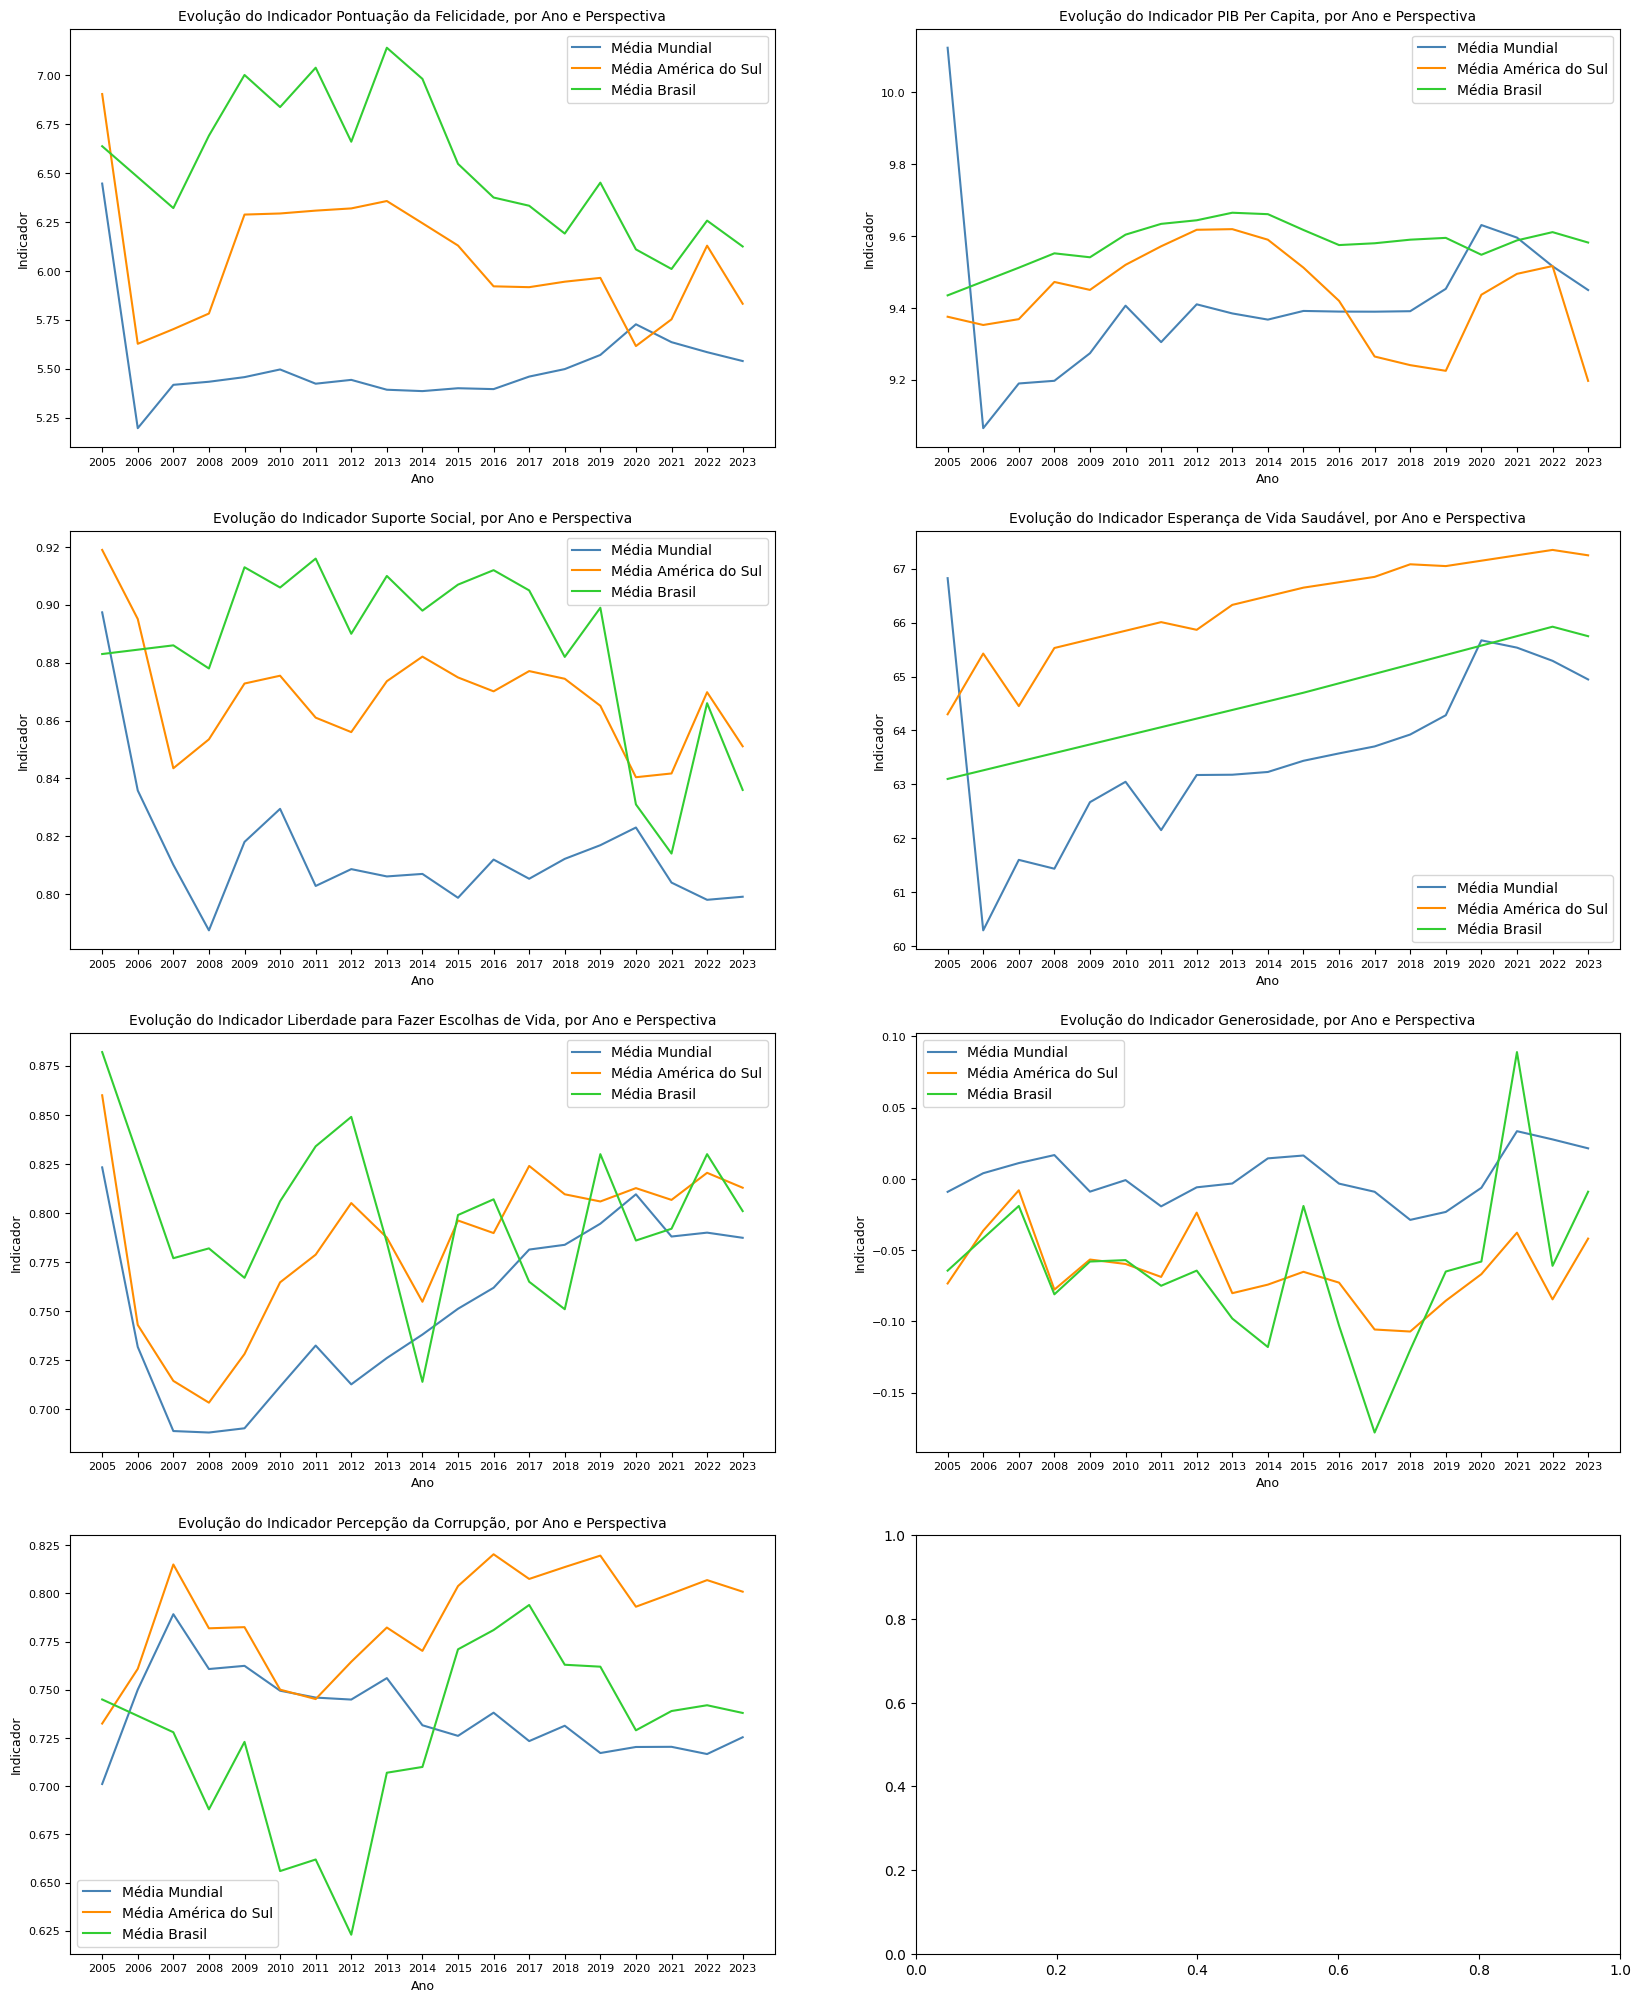

In [30]:
# Gerar gráfico de linhas do comparativo mundial e sul-americano com o Brasil
g_mundial = indicadores[indicadores['perspectiva'] == 'Média Mundial']
g_sul = indicadores[indicadores['perspectiva'] == 'Média América do Sul']
g_brasil = indicadores[indicadores['perspectiva'] == 'Média Brasil']

desc_grafico = ['pontuacao_felicidade','pib_per_capita','suporte_social','esperanca_vida_saudavel','liberdade_fazer_escolhas','generosidade','percepcao_corrupcao']
tit_grafico = ['Pontuação da Felicidade','PIB Per Capita','Suporte Social','Esperança de Vida Saudável','Liberdade para Fazer Escolhas de Vida','Generosidade','Percepção da Corrupção']

fig, axis = plt.subplots(4, 2, figsize = (20,25))

k = 0
for i in range(0,4):
  for j in range(0,2):
    if k <= 6:
      axis[i,j].plot(g_mundial['ano'], g_mundial[desc_grafico[k]], label = 'Média Mundial', color = cor_padrao)
      axis[i,j].plot(g_sul['ano'], g_sul[desc_grafico[k]], label = 'Média América do Sul', color = cor_sul)
      axis[i,j].plot(g_brasil['ano'], g_brasil[desc_grafico[k]], label = 'Média Brasil', color = cor_brasil)

      axis[i,j].set_title(f'Evolução do Indicador {tit_grafico[k]}, por Ano e Perspectiva', size = 10)
      axis[i,j].set_xlabel('Ano', size = 9)
      axis[i,j].set_ylabel('Indicador', size = 9)
      axis[i,j].tick_params(axis = 'x', labelsize = 8)
      axis[i,j].tick_params(axis = 'y', labelsize = 8)
      axis[i,j].legend(loc = 'best')
      
      k = k + 1

plt.show()

Em consonância com as correlações apresentadas anteriormente (item 3.3), observa-se, nos gráficos acima, as relações positivas entre a "Pontuação da Felicidade" e os indicadores "PIB per Capita", "Suporte Social" e "Esperança de Vida Saudável", visualmente muito evidente no gráfico de "Suporte Social" e menos evidente no gráfico de "Esperança de Vida Saudável". Nota-se que, se comparado às médias mundial e sul-americana, o Brasil está mais bem posicionado em relação a esses mesmos indicadores, que são os que apresentam maior correlação positiva com a "Pontuação da Felicidade".

Destaca-se ainda, com relação ao Brasil, o crescimento do indicador "Esperança de Vida Saudável" ocorrido entre os anos 2005 e 2022 que, apesar de acompanhar as tendências mundial e sul-americana, apresentou um crescimento linear, constante até 2023, quando sofreu uma pequena queda similiar à sofrida pela média sul-americana.